<a href="https://colab.research.google.com/github/jose-luis-hernandez-amaya/EDP-1-Ejercicios/blob/main/Fourier_generalizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Resolvemos la ecuacion diferencial con problema de Sturm-Lioville
$$f''(x)2f'(x)+\lambda f = 0$$
Con $$p(x)=1$$
$$q(x)=0$$
$$\sigma (x) = 1$$
$$k_1=k_3=1$$ $$k_2=k_4=0$$

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

N = 100
x_grid = np.linspace(0, 1, 500)

u_exact = np.exp(-x_grid)
peso_sigma = 1

approx_explicit = np.zeros_like(x_grid)

def sl_system(x, y, lam):
    return np.vstack([y[1], -lam * y[0]])

def bc(ya, yb):
    return np.array([ya[0], yb[0]])

def initial_guess(x):
    return np.vstack([np.sin(np.pi * x), np.pi * np.cos(np.pi * x)])



Usaremos la siguiente formula para aproximar
$$C_n=\frac{\int_a^b u(x)f_n(x)\sigma(x) dx}{\int_a^b f_n^2(x)\sigma(x)dx}$$

Graficamos la aproximacion de la serie de Fourier generalizada

<ipython-input-34-d80accc2069d>:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  numerador = np.trapz(u_exact * f_n * peso_sigma, x_grid)
<ipython-input-34-d80accc2069d>:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  denominador = np.trapz(f_n**2 * peso_sigma, x_grid)


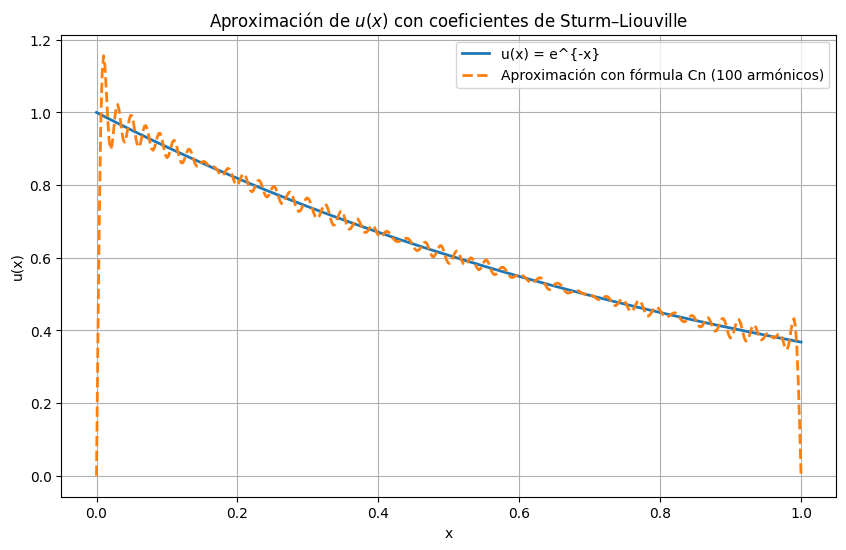

In [34]:
for n in range(1, N + 1):
    lam_guess = (n * np.pi)**2
    sol = solve_bvp(lambda x, y: sl_system(x, y, lam_guess), bc, x_grid, initial_guess(x_grid))

    if sol.success:
        f_n = sol.sol(x_grid)[0]

        numerador = np.trapz(u_exact * f_n * peso_sigma, x_grid)
        denominador = np.trapz(f_n**2 * peso_sigma, x_grid)

        c_n = numerador / denominador

        approx_explicit += c_n * f_n

plt.figure(figsize=(10, 6))
plt.plot(x_grid, u_exact, label='u(x) = e^{-x}', linewidth=2)
plt.plot(x_grid, approx_explicit, '--', label='Aproximación con fórmula Cn (100 armónicos)', linewidth=2)
plt.title('Aproximación de $u(x)$ con coeficientes de Sturm–Liouville')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()